In [1]:
## Creating a graph from text data

### Loading the text data

In [1]:
import pandas as pd

In [2]:
graph_data_path = './Data/graph/'
pickle_data_path = './Data/pickle/'
series_name = 'marseille'
pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'
vocab_file = pickle_data_path+series_name+'_vocab_bow'+'.pkl'
tfidf_file = pickle_data_path+series_name+'_vocab_tfidf'+'.pkl'

In [3]:
text_data = pd.read_pickle(pickle_file)
vocab_data = pd.read_pickle(vocab_file)
tfidf_data = pd.read_pickle(tfidf_file)

In [4]:
# index by date
text_data.index = text_data['date']
del text_data['date']

In [5]:
textseries = text_data.filtered_text.copy()

In [6]:
textseries

date
2015-02-01 12:18:07    @kevniggaz tkt man verras Marseille faire séri...
2015-03-01 12:21:04                   Marseille nova série Netflix #SdTV
2015-03-01 21:46:33    @ChristineBeaume @jl_burger penser serie tourn...
2015-05-01 01:00:00    Originally Posted Durack vraiment bien aimé sa...
2015-05-01 01:00:00    Originally Posted Sharn émerge oui bon hein sé...
2015-05-01 01:00:00    émerge oui bon hein série Marseille 2015 Netfl...
2015-05-01 11:36:55    Série #Netflix Marseille annonce casting févri...
2015-05-01 15:05:00    015 marquera nouvelle ère Plusieurs historiens...
2015-05-01 15:05:41    Sollicités Provence ils évoquent politique soc...
2015-05-01 18:47:12    Ils mettent table Paul Wermus TILLINAC Manuel ...
2015-05-01 19:28:38    janvier 2015 rigole bien mythique prison marse...
2015-05-01 20:37:26    pourquoi pas5 janvier 2015 rejoins complètemen...
2015-05-01 22:46:02    Vite dit grrr rigole bien mythique prison mars...
2015-06-01 00:30:09    pourquoi pas5 janvier 2

In [65]:
#textresample = textseries.resample('M').apply(lambda x:''.join(str(x.values)))
textresample = textseries.resample('M').apply(lambda x:list(x.values))

In [66]:
textresample

date
2015-01-31    [Bonjour Baron noir instant ils encore précisé...
2015-02-28    [fiche royalement savoir passée extrême gauche...
2015-03-31    [baron noir bonne idée vais faire aussi ailleu...
2015-04-30    [@ornikkar baron noir, @OlivierRimmel Baron No...
2015-05-31    [Baron Noir plus grande politique tous temps, ...
2015-06-30    [@Pward13 Baron Noir plus classe, Situé route ...
2015-07-31    [acc ben connu Métal Hurlant Fluide Glacial di...
2015-08-31    [Peux dire plus étrier Montage réglages peux p...
2015-09-30    [Baron Noir Sàrl Neuchâtel #Schweiz #Firma #Fi...
2015-10-31    [baron noir Béziers, Avant drones Baron Noir s...
2015-11-30    [Paroles chanson baron noir chantée Arthur bar...
2015-12-31    [Nouveau coup coeur Arthur Baron Noir #deezer,...
2016-01-31    [2016 Général Divers Aucun commentaire Chers l...
2016-02-29    [CHANSONS Arthur baron noir 1996 Vidéo Paroles...
2016-03-31    [line block class description Facebook cependa...
2016-04-30    [@CanalPlus #KadMerad

In [67]:
textresample.head(10)[0]

['Bonjour Baron noir instant ils encore précisé version Golf GTE ainsi Passat GTE TSI 150 moteur électrique car ils bien précisé moteurs électriques Automobile Magazine Turbo vrai dire pensé Touareg hybride possède juste moteur thermique Voici dit Automobile Magazine Volkswagen Sport Coupé GTE Clairs desseins besoin être fin limier deviner quel sort concept présenté Volkswagen prochain salon Genève seuls quelques aménagements nécessaires donner naissance deuxième génération salon Genève 2015 concept charge annoncer deuxième génération Comme appellation initiale indiquait sans équivoque Volkswagen proche cousine Passat Logique dès lors renouvellement deux familiales intervienne quelques mois intervalles salon Genève concept très réaliste baptisé Sport Coupé GTE viendra effet annoncer lignes deuxième génération débarquera 2016 berline quatre portes conserve traits plus effilés Passat pavillon plus tendu vitres latérales sans encadrement phares plus acérés calandre prolonge jusqu entrée a

In [31]:
text_data

,text,title,platform,hashtags,filtered_text
date,,,,,
2015-02-01 15:00:00,On se fiche royalement de savoir où est passée...,Mais où est donc passée l'extrême gauche ?,Comment,NaN,fiche royalement savoir passée extrême gauche ...
2015-05-01 14:51:00,"Le Baron Noir, plus grande BD politique de tou...",NaN,Twitter,NaN,Baron Noir plus grande politique tous temps
2015-05-01 14:55:29,"Le Baron Noir, suite : http://t.co/4fJXrZjnu7",NaN,Twitter,NaN,Baron Noir suite
2015-05-01 14:57:17,Excellent et teeeellement vrai ! RT@OLecointe:...,NaN,Twitter,NaN,Excellent teeeellement vrai @OLecointe Baron N...
2015-06-01 07:39:08,@Pward13 l'armure de mon Baron Noir a plus de ...,NaN,Twitter,NaN,@Pward13 Baron Noir plus classe
2015-06-01 18:35:37,"Situé à 2h de route de Sharm El Sheikh, Dahab ...",Mer rouge > Egypte > Dahab,Website,NaN,Situé route Sharm Sheikh Dahab saura charmer a...
2015-08-01 10:00:21,Peux tu nous en dire plus sur les étrier? Mont...,"Route • Re: L'arme furtive by ""Le Baron Noir""",Forum,NaN,Peux dire plus étrier Montage réglages peux pa...
2015-08-01 12:23:17,maertens a écrit:Peux tu nous en dire plus sur...,"Route • Re: L'arme furtive by ""Le Baron Noir""",Forum,NaN,maertens écrit Peux dire plus étrier Montage r...
2015-08-01 12:35:32,je confirme.\nStatistiques: Posté de rickyfirs...,"Route • Re: L'arme furtive by ""Le Baron Noir""",Forum,NaN,confirme Statistiques Posté rickyfirst Jeu Jan...


In [10]:
# create the set of most used words
nb_words = 100
word_set = set(tfidf_data.words[0:nb_words])

### Creating the graph

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
G = nx.Graph()

In [13]:
# Add the nodes
G.add_nodes_from(word_set)

In [14]:
import itertools

In [16]:
# Choose the date
#textes = textresample['2015-01']
textes = text_data.filtered_text

In [17]:
# Connect the nodes if they appear in the same text
# the weight is proportional to the number of co-occurences
for text in textes:
    common_words = set(str(text).split())&word_set
    edge_list = list(itertools.combinations(common_words, 2))
    #G.add_edges_from(edge_list)
    for edge in edge_list:
        if G.has_edge(edge[0],edge[1]):
            # we added this one before, just increase the weight by one
            G[edge[0]][edge[1]]['weight'] += 1
        else:
            # new edge. add with weight=1
            G.add_edge(edge[0], edge[1], weight=1)

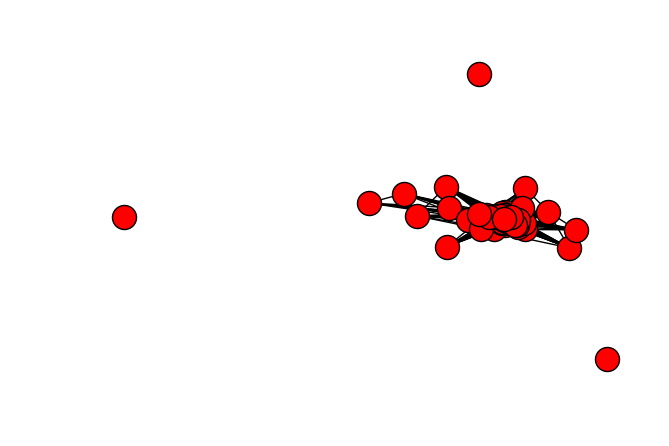

In [18]:
nx.draw_spring(G)
plt.show()

### Community detection

In [15]:
#import community

In [16]:
##first compute the best partition
#clusterDic = community.best_partition(G)

In [17]:
##drawing
#partition = clusterDic
#size = float(len(set(partition.values())))
#pos = nx.spring_layout(G)
#count = 0.
#for com in set(partition.values()) :
#    count = count + 1.
#    list_nodes = [nodes for nodes in partition.keys()
#                                if partition[nodes] == com]
#    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
#                                node_color = str(count / size))


#nx.draw_networkx_edges(G,pos, alpha=0.5)
#plt.show()

In [18]:
#nx.set_node_attributes(G,'cluster',clusterDic)

NameError: name 'clusterDic' is not defined

### Thresholding the edges

In [19]:
# Extracting the edge information
#sum_weight = 0
#n_edges = 0
#for u,v,a in G.edges(data=True):
#    sum_weight+=a['weight']
#    n_edges+=1
#average_weight = sum_weight*1.0/n_edges

In [20]:
# Node properties: degree and centrality
degreeDic = G.degree(weight='weight')
nx.set_node_attributes(G,'degree',degreeDic)
bcDic = nx.betweenness_centrality(G)
nx.set_node_attributes(G,'bCentrality',bcDic)

In [21]:
# Rescaling edge weights
n1,n2,weights = zip(*G.edges(data='weight'))
edges_id=list(zip(n1,n2))

In [22]:
import numpy as np
print('mean weight: '+str(np.mean(weights))+', max weight: '+str(np.max(weights)))

mean weight: 234.383686545, max weight: 3341


In [23]:
weights_n=weights/np.max(weights)
weights_n_dic=dict(zip(edges_id,weights_n)) 
nx.set_edge_attributes(G,'weight',weights_n_dic)

In [24]:
#nx.edge_betweenness_centrality(G, normalized=False)

In [25]:
# Sparsify the graph if the weight are too small
average_weight = np.mean(weights)/np.max(weights)
for u,v,a in G.edges(data=True):
    if a['weight']<average_weight*5:
        G.remove_edge(u,v)

In [26]:
# Write the graph to a json file
from networkx.readwrite import json_graph
datag = json_graph.node_link_data(G)
import json
s = json.dumps(datag)
datag['links'] = [
        {
            'source': datag['nodes'][link['source']]['id'],
            'target': datag['nodes'][link['target']]['id'],
            'weight': link['weight']
        }
        for link in datag['links']]
s = json.dumps(datag)
with open("./memeviz/graph.json", "w") as f:
    f.write(s)

In [27]:
import webbrowser
url = 'http://localhost:8008/forcegraph.html'
#webbrowser.open_new_tab(url)
webbrowser.open_new(url)

True

In [25]:
G.edges(data='weight')

[('série', 'bien', 0.38778747026169708),
 ('série', 'tout', 0.39175257731958762),
 ('série', 'est', 0.8977002379064235),
 ('série', 'nouvelle', 0.55987311657414751),
 ('série', 'aussi', 0.44607454401268837),
 ('série', 'fait', 0.39849325931800161),
 ('série', 'politique', 0.98572561459159402),
 ('série', 'plus', 0.55154639175257736),
 ('série', 'très', 0.40325138778747027),
 ('série', 'faire', 0.34892942109436953),
 ('série', 'il', 0.49960348929421095),
 ('série', 'noir', 0.40007930214115783),
 ('série', 'comme', 0.42030134813639969),
 ('série', 'un', 0.84377478191911182),
 ('série', 'deux', 0.37232355273592388),
 ('série', 'entre', 0.36915146708961144),
 ('bien', 'tout', 0.35646312450436163),
 ('bien', 'est', 0.52854877081681206),
 ('bien', 'fait', 0.35567010309278352),
 ('bien', 'plus', 0.43893735130848532),
 ('bien', 'il', 0.40999206978588421),
 ('bien', 'comme', 0.32870737509912767),
 ('bien', 'un', 0.51784298176050758),
 ('tout', 'est', 0.61062648691514676),
 ('tout', 'fait', 0.39

In [ ]:
clusterDic